In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.diagnostic import normal_ad

гипотезы о том что а не если

In [17]:
df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')
df.columns = ['TimeOfBirth', 'Sex', 'Weight', 'MinutesAfterMidnight']
print(df.shape)
df.head(20)

(44, 4)


/var/folders/19/c1rn4t0n4qn2h0cjhj9f9_3r0000gn/T/ipykernel_64265/104793328.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Задания/Datasets/babyboom.dat.txt", delim_whitespace=True, header=None, on_bad_lines='skip')


,TimeOfBirth,Sex,Weight,MinutesAfterMidnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177
5,405,1,2208,245
6,407,1,1745,247
7,422,2,2846,262
8,431,2,3166,271
9,708,2,3520,428


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   TimeOfBirth           44 non-null     int64
 1   Sex                   44 non-null     int64
 2   Weight                44 non-null     int64
 3   MinutesAfterMidnight  44 non-null     int64
dtypes: int64(4)
memory usage: 1.5 KB


In [19]:
data = df.copy()
df.isnull().sum()

TimeOfBirth             0
Sex                     0
Weight                  0
MinutesAfterMidnight    0
dtype: int64

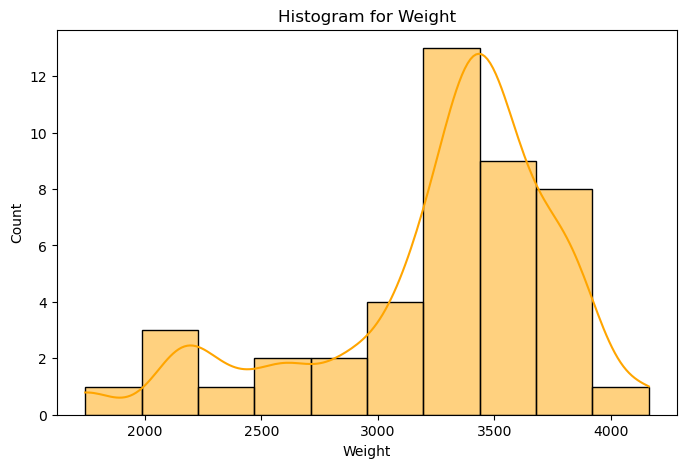

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Weight'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the smoothing level of the KDE
plt.title(f'Histogram for Weight')
plt.show()

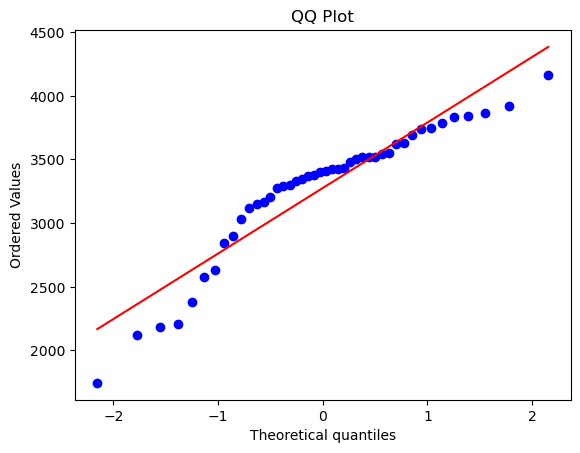

In [21]:
# QQ-plot
stats.probplot(df['Weight'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

In [22]:
#1
# 1. Shapiro-Wilk test
stat, p = stats.shapiro(df['Weight'])
print('Shapiro-Wilk:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("Not normally distributed")
else:
    print("Normally distributed")

# 2. Cramer-von Mises test
result = stats.cramervonmises(df['Weight'], 'norm')
print('\nCramer-von Mises:')
print('Statistic:', result.statistic)
print('p-value:', result.pvalue)
if result.pvalue < 0.05:
    print("Not normally distributed")
else:
    print("Normally distributed")

# 3. Lilliefors (Kolmogorov-Smirnov) test
stat, p = stats.kstest(df['Weight'], 'norm', args=(df['Weight'].mean(), df['Weight'].std()))
print('\nLilliefors (Kolmogorov-Smirnov):')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("Not normally distributed")
else:
    print("Normally distributed")

# 4. Anderson-Darling test
result = stats.anderson(df['Weight'], dist='norm')
print('\nAnderson-Darling:')
print('Statistic:', result.statistic)
print('Critical values:', result.critical_values)
print('Significance levels:', result.significance_level)

# 5. Jarque-Bera test
stat, p = stats.jarque_bera(df['Weight'])
print('\nJarque-Bera:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("Not normally distributed")
else:
    print("Normally distributed")

# 6. Shapiro-Francia test
stat, p = stats.shapiro(df['Weight'] / np.std(df['Weight']))
print('\nShapiro-Francia:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("Not normally distributed")
else:
    print("Normally distributed")

# 7. Pearson's Chi-Square test
# 1. Create histogram of observed frequencies
observed_freq, bins = np.histogram(df['Weight'], bins='auto')

# Remove bins with zero frequency
non_zero_indices = np.where(observed_freq > 0)[0]
observed_freq = observed_freq[non_zero_indices]
bins = bins[non_zero_indices]

# 2. Compute expected frequencies
mean = df['Weight'].mean()
std_dev = df['Weight'].std()
n = len(df['Weight'])

# Recalculate expected frequencies with correct boundaries
expected_freq = np.array([
    n * (stats.norm.cdf(bins[i + 1], mean, std_dev) -
         stats.norm.cdf(bins[i], mean, std_dev))
    for i in range(len(bins) - 1)
])

# Remove zero expected frequencies, if any
valid_indices = np.where(expected_freq > 0)[0]
observed_freq = observed_freq[valid_indices]
expected_freq = expected_freq[valid_indices]

print("\nPearson's Chi-Square:")
print("Sum of observed frequencies:", np.sum(observed_freq))
print("Sum of expected frequencies:", np.sum(expected_freq))

# 3. Conduct Chi-Square test
if observed_freq.size == expected_freq.size and np.isclose(np.sum(observed_freq), np.sum(expected_freq)):
    chi2_stat, p = stats.chisquare(observed_freq, expected_freq)
    print('Statistic:', chi2_stat, 'p-value:', p)
else:
    print("Error: Sizes of observed and expected frequencies do not match or their sums differ.")

Shapiro-Wilk:
Statistic: 0.8987229755100873 p-value: 0.0009943974027275867
Not normally distributed

Cramer-von Mises:
Statistic: 14.66666666666667
p-value: 0
Not normally distributed

Lilliefors (Kolmogorov-Smirnov):
Statistic: 0.18336357215784677 p-value: 0.09106523162555868
Normally distributed

Anderson-Darling:
Statistic: 1.7168461277690241
Critical values: [0.534 0.609 0.73  0.852 1.013]
Significance levels: [15.  10.   5.   2.5  1. ]

Jarque-Bera:
Statistic: 10.351560931737778 p-value: 0.0056518041519338
Not normally distributed

Shapiro-Francia:
Statistic: 0.898722975510087 p-value: 0.0009943974027275683
Not normally distributed

Pearson's Chi-Square:
Sum of observed frequencies: 43
Sum of expected frequencies: 39.025811667936466
Error: Sizes of observed and expected frequencies do not match or their sums differ.


    p-значение < 0.05 (или 0.01): Это указывает на то, что данные не распределены нормально.    
    Если бы p-значение было больше 0.05, это указывало бы что данные нормально распределены.
    
    Получается общие данные не подчиняются нормальному распределению не по одному из критериев


## Проверка статистических гипотез

### 1. Выдвижение гипотез

1. **Нулевая гипотеза (\( H_0 \))** и **альтернативная гипотеза (\( H_1 \))**.
2. Задается уровень значимости критерия \( \alpha \). Обычно \( \alpha \) выбирается равным 0.001, 0.01 или 0.05.

---

### 2. Выбор статистики критерия

- Выбирается статистика критерия \( \gamma(X[n]) \), так, что при условии справедливости гипотезы \( H_0 \), статистика \( \gamma(X[n]) \) подчиняется некоторому известному закону распределения вероятностей.

---

### 3. Определение критической области

- В качестве критической области для гипотезы \( H_0 \) выбирается такая область возможных значений статистики \( \gamma(X[n]) \), попадание в которую при условии справедливости гипотезы \( H_0 \) выглядит маловероятным по сравнению с возможностью попадания статистики \( \gamma(X[n]) \) в указанную область при условии справедливости гипотезы \( H_1 \).

#### Критическая область может состоять из одного интервала:
- \( (-\infty, z_\alpha) \) или \( (z_{1-\alpha}, \infty) \), где \( z_\alpha \) и \( z_{1-\alpha} \) — квантили уровней \( \alpha \) и \( 1-\alpha \) закона распределения, которому подчиняется (возможно, асимптотически) статистика \( \gamma(X[n]) \).

#### Критическая область может состоять из двух интервалов:
- \( (-\infty, z_{\alpha/2}) \) и \( (z_{1-\alpha/2}, \infty) \), где \( z_{\alpha/2} \) и \( z_{1-\alpha/2} \) — квантили уровней \( \alpha/2 \) и \( 1-\alpha/2 \).

---

### 4. Принятие или отклонение гипотезы

- Если численное значение статистики \( \gamma(X[n]) \) попадает в критическую область, то нулевая гипотеза \( H_0 \) отклоняется (с вероятностью ошибки \( \alpha \)), и принимается альтернативная гипотеза \( H_1 \).
- Если численное значение статистики \( \gamma(X[n]) \) не попадает в критическую область, то нет оснований отвергнуть нулевую гипотезу.

---

### 5. Альтернативный подход: p-value

- Найдем вероятность, которая называется **p-значением (p-value)**. Это вероятность при справедливости нулевой гипотезы получить более экстремальные значения.
- Если p-value меньше заданного уровня значимости (обычно 0.05), то нулевая гипотеза отвергается в пользу альтернативной.
- Если p-value больше заданного уровня значимости, то нулевая гипотеза не отвергается.

---


In [23]:
boys_data = df[df['Sex'] == 2]
girl_data = df[df['Sex'] == 1]

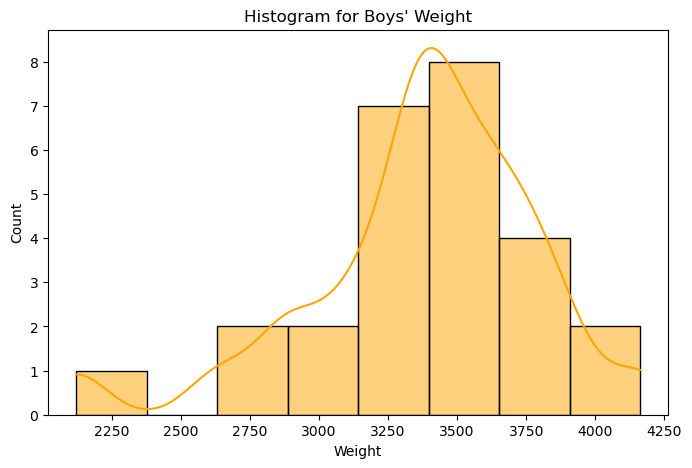

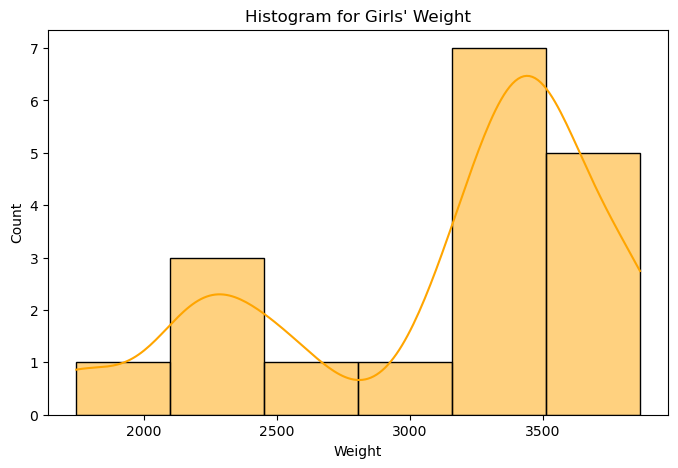

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(boys_data['Weight'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the level of smoothing for the KDE
plt.title(f'Histogram for Boys\' Weight')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(girl_data['Weight'], kde=True, color='orange', kde_kws={'bw_adjust': 0.5})  
# kde=True adds a density line
# bw_adjust adjusts the level of smoothing for the KDE
plt.title(f'Histogram for Girls\' Weight')
plt.show()

In [25]:
#2
# Shapiro-Wilk
stat, p = stats.shapiro(boys_data['Weight'])
print('Shapiro-Wilk boys:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("Not normally distributed")
if p > 0.05:
    print("Normally distributed")

# Shapiro-Wilk
stat, p = stats.shapiro(girl_data['Weight'])
print('Shapiro-Wilk girls:')
print('Statistic:', stat, 'p-value:', p)
if p < 0.05:
    print("Not normally distributed")
if p > 0.05:
    print("Normally distributed")

Shapiro-Wilk boys:
Statistic: 0.9474738942208476 p-value: 0.20224825440795427
Normally distributed
Shapiro-Wilk girls:
Statistic: 0.8702829450561838 p-value: 0.017984789994719325
Not normally distributed


    Получается данные мальчиков подчиняются нормальному распределению
    А девочек нет

In [26]:
# Extracting data
data = df[['TimeOfBirth', 'Weight', 'MinutesAfterMidnight']]

# Calculating mean and standard deviation for each column
mean = data.mean()
std_dev = data.std(ddof=1)  # Using ddof=1 for sample standard deviation
n = len(data)

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Defining critical value (z-value for normal distribution)
z_critical = stats.norm.ppf(1 - alpha / 2)

# Calculating standard error
standard_error = std_dev / np.sqrt(n)

# Calculating confidence intervals
margin_of_error = z_critical * standard_error

# Confidence intervals for the mean
confidence_intervals = (mean - margin_of_error, mean + margin_of_error)

# Defining critical chi-squared values
chi2_lower = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

# Calculating confidence intervals for standard deviation
lower_bound = np.sqrt((n - 1) * std_dev**2 / chi2_upper)
upper_bound = np.sqrt((n - 1) * std_dev**2 / chi2_lower)

# Output results
for column in data.columns:
    print(f"Confidence interval for standard deviation of {column}: ({lower_bound[column]:.2f}, {upper_bound[column]:.2f})")
    print(f"Confidence interval for mean of {column}: {confidence_intervals[0][column]:.2f} - {confidence_intervals[1][column]:.2f}\n")

Confidence interval for standard deviation of TimeOfBirth: (570.68, 875.14)
Confidence interval for mean of TimeOfBirth: 1091.91 - 1500.09

Confidence interval for standard deviation of Weight: (436.27, 669.03)
Confidence interval for mean of Weight: 3119.93 - 3431.98

Confidence interval for standard deviation of MinutesAfterMidnight: (343.76, 527.17)
Confidence interval for mean of MinutesAfterMidnight: 665.79 - 911.66



# Доверительные интервалы для среднего и стандартного отклонения

1. **Доверительный интервал (CI)** — это диапазон значений, который с заданной вероятностью (уровень доверия) содержит истинное значение параметра распределения. Например, 95%-ный доверительный интервал указывает, что с вероятностью 95% истинное значение параметра находится в этом интервале.

## Доверительный интервал для среднего (\(\mu\))

2. **Формула для нормального распределения (при \(n > 30\)):**
   $$CI = \left( \bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}}, \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \right)$$
   - \(\bar{x}\) — выборочное среднее.
   - \(\sigma\) — стандартное отклонение выборки.
   - \(n\) — объем выборки.
   - \(z_{\alpha/2}\) — квантиль стандартного нормального распределения, соответствующий уровню доверия (например, 1.96 для 95%).

3. **Формула для небольших выборок (при \(n < 30\)):**
   $$CI = \left( \bar{x} - t_{\alpha/2} \cdot \frac{s}{\sqrt{n}}, \bar{x} + t_{\alpha/2} \cdot \frac{s}{\sqrt{n}} \right)$$
   - \(s\) — выборочное стандартное отклонение.
   - \(t_{\alpha/2}\) — квантиль распределения Стьюдента с \(n-1\) степенями свободы.

## Доверительный интервал для стандартного отклонения (\(\sigma\))

4. **Формула для стандартного отклонения:**
   $$CI = \left( \sqrt{\frac{(n-1) s^2}{\chi^2_{\alpha/2, n-1}}}, \sqrt{\frac{(n-1) s^2}{\chi^2_{1-\alpha/2, n-1}}} \right)$$
   - \(s\) — выборочное стандартное отклонение.
   - \(\chi^2_{\alpha/2, n-1}\) — квантиль хи-квадрат распределения с \(n-1\) степенями свободы.

## Уровень доверия

5. **Уровень доверия** — это вероятность того, что истинное значение параметра находится в доверительном интервале.
   - Для уровня доверия 95%, квантиль \(z_{\alpha/2} = 1.96\).
   - Для уровня доверия 99%, квантиль \(z_{\alpha/2} = 2.576\).

6. **Основные замечания**:
   - Чем больше выборка (\(n\)), тем уже доверительный интервал, так как оценка становится более точной.
   - Доверительный интервал не гарантирует, что параметр точно находится внутри этого интервала, но с заданной вероятностью это верно.
   - Для малых выборок используется распределение Стьюдента, а для стандартного отклонения — \(\chi^2\)-распределение.



In [27]:
#2 
# Check the hypothesis that the time between births follows an exponential distribution.
# 1. Calculate time differences between births
df['TimeDiff'] = df['TimeOfBirth'].diff()
df['TimeDiff'] = df['TimeDiff'].fillna(0)
# Remove NaT (the first value, as it has no difference)
time_diffs = df['TimeDiff']

# 2. Point estimate of the parameter
mean_time = np.mean(time_diffs)
lambda_hat = 1 / mean_time  # Estimate of parameter λ

# 3. Formulate the hypothesis
alpha = 0.05  # Significance level

# 4. Perform the Kolmogorov-Smirnov test
D_statistic, p_value = stats.kstest(time_diffs, 'expon', args=(0, 1/lambda_hat))

# 5. Hypothesis testing
print(f"D-statistic: {D_statistic}, p-value: {p_value}")

if p_value < alpha:
    print("The alternative hypothesis is true.")
else:
    print("The null hypothesis is true.")

D-statistic: 0.09960928919270534, p-value: 0.7377967746280287
The null hypothesis is true.


In [28]:
#3
df['TimeDiff'] = df['TimeOfBirth'].diff()
df['TimeDiff'] = df['TimeDiff'].fillna(0)
# Remove NaT (the first value, as it has no difference)
time_diffs = df['TimeDiff']

# Estimate parameter λ (mean time between events)
lambda_hat = np.mean(time_diffs)

# Count observations for each value (histogram)
observed_counts = np.bincount(time_diffs.astype(int))

# Expected values based on the Poisson distribution
expected_counts = len(time_diffs) * stats.poisson.pmf(np.arange(len(observed_counts)), lambda_hat)

# Chi-square test
chi2_stat, p_value = stats.chisquare(observed_counts, expected_counts)

# Hypothesis testing
alpha = 0.05
print(f"Chi² statistic: {chi2_stat}, p-value: {p_value}")

if p_value < alpha:
    print("The hypothesis of the Poisson distribution is rejected.")
else:
    print("The hypothesis of the Poisson distribution is accepted.")

Chi² statistic: 7.766034985546727e+100, p-value: 0.0
The hypothesis of the Poisson distribution is rejected.


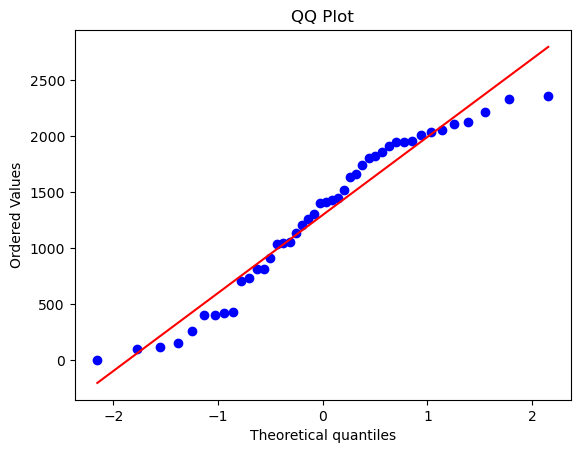

In [29]:
# QQ plot
stats.probplot(df['TimeOfBirth'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()